## pydANN ( python deep Artificial Neural Network )

is a free and open source python library to implement the Machine Learning algorithm of neural networks
The network can be as simple as a sinle layer perceptron net or a multi-layer deep neural net.
THe design and modifications of this library is posted [here](https://www.github.com/ShimronAlakkal)


### 1 - Packages

These are some of the most important packages that you're going to need in order to use ***```pydANN```***

- [numpy](www.numpy.org) (or numeric python) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs -- which are optional -- in Python.
- [pickle](https://docs.python.org/3/library/pickle.html) is the library pydANN uses to save your trained models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 

### Custom tools (functions) that are called inside of the activation layer.
To specify the activation function for a layer use `activation_specific = f` with `addHL()`,  where `f` is a list, of length of hidden layers + 1, and each index with a custom function name.
If there is a mismatch in the input activation_specifics, the model is going to auto adjust the activation with the last ones from your input.

In [2]:
def relu(Z):
    return np.maximum(0,Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-1 * Z))

def leaky_relu(Z):
    return np.maximum(0.1*Z)

def sigmoid_d(Z):
    return sigmoid(Z) * ( 1 - sigmoid(Z) ) 

def relu_d(Z):
    Z[Z >= 0] = 1
    Z[Z < 0]  = 0
    return Z

In [150]:
class ann:
    
    def __init__(self):
        self.hidden_Layers = [3,2]
        self.total_layers = []
        self.learning_rate = 0
        self.epoch = 0
        self.W = {}
        self.b = {}
        self.Z = {}
        self.A = {}
        self.activation_functions = []
        self.costs = [0]
        self.dW = {}
        self.db = {}
        self.dZ = {}
        self.dA = {}
        self.lr_change = []
        
    
    
    def add_hl(self,hl,activations ):
        self.hidden_Layers.clear()
        self.hidden_Layers = hl
        
        # settingf the activations
        if len(activations) == len(hl)+1:
            self.activation_functions = activations
        else:
            print('Passed activations should be 1 more than the HL length \n recall the function to override HL')
                
        
    def dispose_model(self):
        self.total_layers.clear()
        self.hidden_Layers.clear()
        self.costs.clear()
        self.lr_change.clear()
        self.Z.clear()
        self.W.clear()
        self.b.clear()
        self.db.clear()
        self.dW.clear()
        self.dZ.clear()
        self.dA.clear()
            
    def register_training_data(self,train_x,train_y):
        self.total_layers.clear()
        self.total_layers.append(train_x.shape[0])
        for i in self.hidden_Layers:
            self.total_layers.append(i)
       
        # network structure
        self.total_layers.append(train_y.shape[0])
        print(f"Network structure update :{self.total_layers}\n feature(s) : {self.total_layers[0]} \n label(s) : {self.total_layers[-1]} \n hidden layers : {self.hidden_Layers}")
        
        
        
    def init_Params(self,verbose = False):
        
        # creating the weights and biases with seed(1)
        np.random.seed(144)
        for i in range(1,len(self.total_layers)):
            
            self.W['W'+str(i)] = np.random.randn(self.total_layers[i],self.total_layers[i-1]) * 0.01
            self.b['b'+str(i)] = np.random.randn(self.total_layers[i],1)
        
        if verbose:
            print('shape of weight(s) initialized : \n ')
            for i in self.W.values():
                print(i.shape)
            print('shape of bias(es) initialized : \n ')
            for i in self.b.values():
                print(i.shape)

    
    
    def forePropagate(self,train_x):
        self.A['A0'] = train_x
        a = self.activation_functions
        
        # populating Z and A with data
        for i in range(1,len(self.total_layers)):
            
            # the formula for fore-propagation is z = W.X + b
            self.Z[ 'Z'+str(i) ] = np.dot( self.W['W'+str(i)] , self.A['A'+str(i-1)] ) + self.b['b'+str(i)]
          
            # populating the activation dictionary with index values
            
            if a[i-1] == 'relu':
                self.A['A'+str(i)] = relu( self.Z['Z'+str(i)] )
            elif a[i-1] == 'sigmoid': 
                self.A['A'+str(i)] = sigmoid( self.Z['Z'+str(i)] )
            else:
                self.A['A'+str(i)] = leaky_relu( self.Z['Z'+str(i)] )
                
    
    def cost_calc(self,Y,loss_function ):
        
        # the `m` used in cost functions represent the total number of training examples
        if loss_function in ['mse','MSE']:
            
            # use mean squared error function     
            loss = ( 1 /  Y.shape[1]) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))
            cost = np.squeeze(loss)
         
            self.costs.append(cost)
            
            
        else : #['rmse','RMSE']:
            
            # use the root mean squared function
            loss = np.sqrt( ( 1 / Y.shape[1]) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))) 
            cost = np.squeeze(loss)
            
            self.costs.append(cost)
        
#         elif loss_function in ['mae','MAE']:
            
#             use the mean absolute error function here 
#             self.costs.append( 1 / Y.shape[1] * (np.sum(  )) )  # you're going to have to do modulus here
            
#         else:
            
#             # use binary cross entropy
#             self.costs.append( np.squeeze(-1 * np.sum( np.multiply( Y ,np.log(self.A[ 'A'+str(len(self.total_layers)-1)]) ) +
#                                                         np.multiply( (1-Y),np.log(1-self.A[ 'A'+str(len(self.total_layers)-1)]) ) ) / Y.shape[1] ) )
            
            
            
    def back_prop(self,Y):
        
        # compute dA final layer 
        self.dA['dA'+str(len(self.total_layers)-1)] =  (-1 * np.divide(Y,self.A['A'+str(len(self.total_layers)-1)])) - np.divide(1-Y, 1-self.A['A'+str(len(self.total_layers)-1)])
        
        
        # check for the final layer activation_func
        if self.activation_functions[-1] == 'sigmoid':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , sigmoid_d(self.Z['Z'+str(len(self.total_layers)-1)]) )
        elif self.activation_functions[-1] == 'relu':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , relu_d(self.Z['Z'+str(len(self.total_layers)-1)]) )
#         else:
#             self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , leaky_relu(self.Z['Z'+str(len(self.total_layers)-1)]) )
        
        # get dW final layer
        self.dW['dW'+str(len(self.total_layers)-1)] = ( 1 / Y.shape[1] ) * np.dot( self.dZ['dZ'+str(len(self.total_layers)-1)] , self.A['A'+str(len(self.total_layers)-2)].T )
        
        # get db final layer 
        self.db['db'+str(len(self.total_layers)-1)] = (1/Y.shape[1]) * np.sum(self.dZ['dZ'+str(len(self.total_layers)-1)],axis = 1, keepdims = True)
        
        self.dA['dA'+str(len(self.total_layers)-2)] = np.dot(self.W['W'+str(len(self.total_layers)-1)].T , self.dZ['dZ'+str(len(self.total_layers)-1)] )
        
        
        # loop over the number of hidden layers + 1 in the network in reverse and find weights and biases for them
        for i in reversed(range(1,len(self.total_layers)-1)):
            
            # check for DZ and get it done
            if self.activation_functions[i] == 'sigmoid':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , sigmoid_d(self.Z['Z'+str(i)]) )
            elif self.activation_functions[i] == 'relu':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , relu_d(self.Z['Z'+str(i)]) )
#             else:
#                 self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , leaky_relu_d(self.Z['Z'+str(i)]) )
      
            
            self.dW['dW'+str(i)] = np.dot(self.dZ['dZ'+str(i)], self.A['A'+str(i - 1)].T) / Y.shape[1]
            self.db['db'+str(i)] = np.sum(self.dZ['dZ'+str(i)], axis = 1, keepdims = True) / Y.shape[1]
            self.dA['dA'+str(i - 1)] = np.dot(self.W['W'+str(i)].T, self.dZ['dZ'+str(i)])
        
        
    
    def param_update(self):
        for i in range(1,len(self.total_layers)):
            self.W['W'+str(i)] -= self.learning_rate * self.dW['dW'+str(i)]
            self.b['b'+str(i)] -= self.learning_rate * self.db['db'+str(i)]
            
            
            
    def fit(self,xtrain,ytrain,epoch = 50, learning_rate = 0.01, verbose = 0,decay = True, decay_iter = 5, decay_rate = 0.9, stop_decay_counter = 100, loss_function = 'mse'):
#         tx = xtrain.T
#         ty = ytrain.T
        self.learning_rate = learning_rate
        self.costs.clear()
        self.lr_change.clear()
        
        self.register_training_data(xtrain,ytrain)
        self.init_Params()
        
        for i in range(epoch):
            
            self.forePropagate(tx)
            
            self.cost_calc(ty,loss_function = loss_function)
            
            self.back_prop(ty)
            
            self.param_update()
            
            self.lr_change.append(self.learning_rate)
            
            if decay and stop_decay_counter > 0 and i % decay_iter == 0:
                self.learning_rate = decay_rate * self.learning_rate
                stop_decay_counter -= 1
                self.lr_change.append(self.learning_rate)
                
            if verbose and i % verbose == 0 and str( self.costs[-1] ) != 'nan':
                
                print(f'epoch {i} : \t cost = {self.costs[-1]}')
                print(f'learning rate / alpha \t{self.learning_rate}\n')
            
        print(f'epoch {epoch}:\t  cost = {self.costs[-1]}')
        print(f'learning rate / alpha \t{self.learning_rate}\n')
                
                
            
                
        
    
    def predict(self,xtest):
        
        # we fore prop at first and return the last A
        self.forePropagate(xtest)
        
        return self.A['A'+str(len(self.total_layers)-1)]
    
    
    
    def mse_model_eval(self,ytest,ypreds):
        
        # compute the Mean Squared Error with y-preds and y-test
        try:
            loss = ( 1 / ypreds.shape[1]) * ( np.sum(np.square (  ypreds - self.A[ 'A'+str(len(self.total_layers)-1)])))
            print(np.squeeze(loss))
        except:
            print('Please check the indices and re-try')
            
            
    
    def plot_cost_to_epoch(self):
        self.costs = [self.costs[x] for x in range(1,len(self.costs)) if str(self.costs[x]) != 'nan' ]
        plt.plot(self.costs, color = 'r')
        plt.show()
        
    def plot_lrc_to_epoch(self):
        plt.plot(self.lr_change)
        plt.show;
    
    
    
    def save_model(self,file = 'pydann_model.dat'):
        
        model = {'w':self.W,'b':self.b,'lr':self.learning_rate,'actvns':self.activation_functions,
                        'hl':self.hidden_Layers,'tl':self.total_layers}
        with open(file,'wb') as file :
            pickle.dump(model,file)
        
        
    
    def use_model(self,path):
        try:
            with open(path,'rb') as file:
                model = pickle.load(file)
                self.W = model['w']
                self.b = model['b']
                self.activation_functions = model['actvns']
                self.total_layers = model['tl']
                self.hidden_Layers = model['hl']
                self.learning_rate = model['lr']
        except:
            print(f"unable to open {path}\n check if you've added the file extension(.dat) with the file path")
    
    
    def auto_model_setup(self,seed):
        pass
    
    def help(self):
        print('''
        \033[1m 
        ANN model Help
        
        Inorder to make an Artificial Neural Network model using pydANN, intanciate the class ann()
        \033[0m 
        model = ann()
        
        \033[1m
        Inorder to add hidden layers to the model use the method add_hl( hidden_Layers_list , activations_for_each_layer + 1 )
        \033[0m
        
        
        # we are now going to add hidden layers to the model 

        model.add_hl( [ 2,5,5 ] , activation_functions = ['relu', 'relu' ,'relu' ,'sigmoid'] )

        # the above line adds to the model three hidden layers each of 2, 5 and 5 nodes, respectively. 
        # The activation_functions should be 1 more in length so as to have one for each hl and an activation for the output layer
        
        \033[1m
        To train the model, use the fit( xtrain, ytrain, epoch = 50, learning_rate = 0.01, verbose = 0,decay = True, decay_iter = 5, decay_rate = 0.9, stop_decay_counter = 100, loss_function = 'mse' ) method
        \033[0m
        
        # you can also register the training data before you train the model.

        model.fit( train_x , y_train )  # this is the basic implementation of the method without any alteration
        epoch : The number of iterations to train the model
         
         
        \033[1m 
        learning_rate : \033[0m The value with which the algorithm optimizes weights and biases
\033[1m
        verbose :\033[0m When put 0, verbose is False ( There won't be data printing ) if set to another value other than 0, then the data is printed after each verbose interval
\033[1m
        decay :\033[0m This value optimizes the learning_rate when set to True
\033[1m
        loss_function :\033[0m The function using which the loss is calculated. Loss function option : 'mse' , 'rmse'
\033[1m
        decay_rate :\033[0m The fractional value with which the learning rate is altered
\033[1m
        To plot the change in the cost(s) after each epoch, use plot_cost_to_epoch()
               \033[0m

        model.plot_cost_to_epoch()
        
        \033[1m
        To plot the change in learning_rate after each epoch, use plot_lrc_to_epoch()
        model.plot_lrc_to_epoch()
        
                \033[0m

        \033[1m 
        To predict on test data, use the function predict( xtest )
        \033[0m
        y_predictions = model.predict( xtest )
        
        \033[1m
        To evaluate the model base on Mean Squared Error, use mse_model_eval( ytest,ypreds )
        \033[0m
        model.mse_model_eval( ytest,ypreds )
        
        \033[1m
        To save the current trained model use method save_model( file = 'pydann_model.dat' )
        \033[0m
        
        # 'file' is the name of the file in which the model would be saved and it has to be a .dat file
        model.save_model()     # to save the model as pydann_model.dat just call the function like this

        # to customize the name of the file in which the model should be saved , change 'file'
        model.save_model( file = 'model.dat' )
       
       \033[1m
       To use the saved model use method use_model( path )
        \033[0m
        # path is the file path ( directory ) to the saved model
        model.use_model( )
        
        \033[1m
        To dispose the model and clear memory use the dispose_model() method
        \033[0m
        model.dispose_model() 
        
        ''')


# Example of the model on meaningless data which might make the whole thing go wrong

In [151]:
model = ann()

In [152]:
model.help()


         
        ANN model Help
        
        Inorder to make an Artificial Neural Network model using pydANN, intanciate the class ann()
         
        model = ann()
        
        
        Inorder to add hidden layers to the model use the method add_hl( hidden_Layers_list , activations_for_each_layer + 1 )
        
        
        
        # we are now going to add hidden layers to the model 

        model.add_hl( [ 2,5,5 ] , activation_functions = ['relu', 'relu' ,'relu' ,'sigmoid'] )

        # the above line adds to the model three hidden layers each of 2, 5 and 5 nodes, respectively. 
        # The activation_functions should be 1 more in length so as to have one for each hl and an activation for the output layer
        
        
        To train the model, use the fit( xtrain, ytrain, epoch = 50, learning_rate = 0.01, verbose = 0,decay = True, decay_iter = 5, decay_rate = 0.9, stop_decay_counter = 100, loss_function = 'mse' ) method
        
        
        # you c

In [143]:
model.add_hl([8,6,6,3],activations = ['relu','sigmoid','relu','relu','sigmoid'])

In [122]:
np.random.seed(13234)
tx = np.random.random((3,100))
ty = np.random.random((1,100))

In [123]:
model.register_training_data(np.random.random((3,100)),np.random.random((1,100)))

Network structure update :[3, 8, 6, 6, 3, 1]
 feature(s) : 3 
 label(s) : 1 
 hidden layers : [8, 6, 6, 3]


In [124]:
model.init_Params()

In [125]:
model.forePropagate(tx)

print(model.W)
print()
print(model.b)

{'W1': array([[-0.01298571, -0.00092539,  0.00070074],
       [ 0.01855052,  0.0137026 , -0.0018258 ],
       [-0.01170023,  0.01027954, -0.00834468],
       [ 0.00187793, -0.00648421,  0.00829418],
       [-0.01505343,  0.00870126,  0.01223903],
       [-0.02231902,  0.00028256,  0.00310356],
       [ 0.00554466,  0.00293178,  0.00538658],
       [ 0.01067838, -0.01733088, -0.00193664]]), 'W2': array([[ 0.00211083,  0.00659727, -0.00546553,  0.00159969, -0.00299756,
         0.00271352,  0.01249906, -0.01398527],
       [ 0.0023012 , -0.00224214, -0.00360311, -0.00192167,  0.01998439,
         0.01085534, -0.01633774, -0.01309612],
       [-0.01763754, -0.01216804, -0.00234821, -0.00437128, -0.00292036,
         0.00276368, -0.00802196, -0.00089666],
       [-0.00299194, -0.00312767, -0.00597397, -0.00332675,  0.00213999,
         0.01406547,  0.00250701,  0.00974168],
       [-0.00032676,  0.00814333, -0.00787541,  0.00264752, -0.0107492 ,
        -0.0042068 , -0.00892893,  0.0092792

In [126]:
model.cost_calc(ty,loss_function = 'mse')

In [127]:
model.back_prop(ty)

In [128]:
print(model.dW)

{'dW5': array([[ 0.        ,  0.        , -0.02062989]]), 'dW4': array([[-1.38032712e-03,  0.00000000e+00,  0.00000000e+00,
        -1.25046763e-03,  0.00000000e+00, -7.24257207e-05],
       [ 1.02314859e-03,  0.00000000e+00,  0.00000000e+00,
         9.26892015e-04,  0.00000000e+00,  5.36845742e-05],
       [-1.90858924e-03,  0.00000000e+00,  0.00000000e+00,
        -1.72903149e-03,  0.00000000e+00, -1.00143618e-04]]), 'dW3': array([[ 1.25889114e-05,  7.57461018e-06,  8.46402566e-06,
         7.51765565e-06,  1.35354197e-05,  2.77118705e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.16515108e-05, -1.90443676e-05, -2.12805692e-05,
        -1.89011704e-05, -3.40312574e-05, -6.96742190e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.000000

In [129]:
model.param_update()

In [138]:
model.fit(tx,ty,verbose=100,decay=True,decay_rate=0.25,learning_rate = 0.001,epoch=50,loss_function='mse')

Network structure update :[3, 8, 6, 6, 3, 1]
 feature(s) : 3 
 label(s) : 1 
 hidden layers : [8, 6, 6, 3]
epoch 0 : 	 cost = 0.11466460167592583
learning rate / alpha 	0.00025

epoch 50:	  cost = 0.11458232791021854
learning rate / alpha 	9.5367431640625e-10



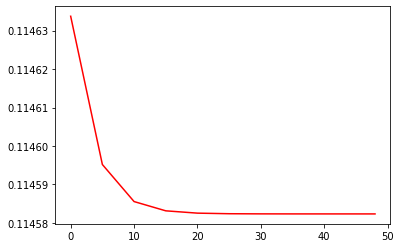

None


In [139]:
print(model.plot_cost_to_epoch())

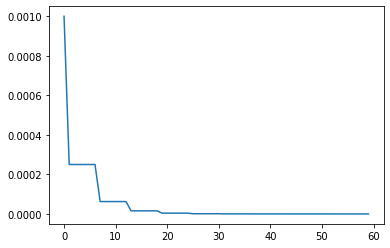

In [140]:
model.plot_lrc_to_epoch()

In [108]:
np.random.seed(324)
testx = np.random.random((3,100))
testy = np.random.random((1,100))

In [109]:
yp = model.predict(testx)
yp


array([[0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32200169, 0.32200169,
        0.32200169, 0.32200169, 0.32200169, 0.32

In [110]:
ty

array([[0.71299246, 0.04982137, 0.73016145, 0.25420998, 0.44495708,
        0.86496786, 0.82793213, 0.27713124, 0.97564147, 0.08728128,
        0.94509777, 0.57506829, 0.24638781, 0.44148505, 0.77545156,
        0.19365395, 0.76892746, 0.51696696, 0.97428524, 0.25537007,
        0.50956582, 0.40803774, 0.17743865, 0.85696992, 0.12666446,
        0.66571726, 0.79701508, 0.04241896, 0.67201997, 0.36202775,
        0.20823939, 0.23633635, 0.54961093, 0.68388619, 0.73546364,
        0.04760658, 0.0557305 , 0.15886655, 0.5270601 , 0.29028623,
        0.24058677, 0.17946958, 0.23064873, 0.54216192, 0.99752858,
        0.88929343, 0.62739846, 0.69308132, 0.07062972, 0.78011738,
        0.54604046, 0.03684448, 0.15091113, 0.90119243, 0.73694127,
        0.65615975, 0.66214813, 0.00311905, 0.74818888, 0.31146595,
        0.04914621, 0.71315964, 0.81575319, 0.14434124, 0.74409798,
        0.57179619, 0.58861185, 0.74917765, 0.91269009, 0.02548648,
        0.49978538, 0.22127859, 0.06628092, 0.72

In [111]:
model.mse_model_eval(testy,yp)

0.0


In [112]:
model.save_model()

In [113]:
model.use_model('pydann_model.dat')

In [144]:
model.describe()


        
        ANN model Help
        
        Inorder to make an Artificial Neural Network model using pydANN, intanciate the class ann()
        model = ann()
        Inorder to add hidden layers to the model use the method add_hl( hidden_Layers_list , activations_for_each_layer + 1 )
        # we are now going to add hidden layers to the model 

        model.add_hl( [ 2,5,5 ] , activation_functions = ['relu', 'relu' ,'relu' ,'sigmoid'] )

        # the above line adds to the model three hidden layers each of 2, 5 and 5 nodes, respectively. 
        # The activation_functions should be 1 more in length so as to have one for each hl and an activation for the output layer
        To train the model, use the fit( xtrain, ytrain, epoch = 50, learning_rate = 0.01, verbose = 0,decay = True, decay_iter = 5, decay_rate = 0.9, stop_decay_counter = 100, loss_function = 'mse' ) method
        # you can also register the training data before you train the model.

        model.fit( train_x ,